In [ ]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot


def define_discriminator(in_shape=(28,28,1)):
 model = Sequential()
 model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Dropout(0.4))
 model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Dropout(0.4))
 model.add(Flatten())
 model.add(Dense(1, activation='sigmoid'))

 opt = Adam(lr=0.0002, beta_1=0.5)
 model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
 return model


def define_generator(latent_dim):
 model = Sequential()

 n_nodes = 128 * 7 * 7
 model.add(Dense(n_nodes, input_dim=latent_dim))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Reshape((7, 7, 128)))

 model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))

 model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
 return model


def define_gan(g_model, d_model):

 d_model.trainable = False

 model = Sequential()

 model.add(g_model)

 model.add(d_model)

 opt = Adam(lr=0.0002, beta_1=0.5)
 model.compile(loss='binary_crossentropy', optimizer=opt)
 return model


def load_real_samples():

 (trainX, _), (_, _) = load_data()

 X = expand_dims(trainX, axis=-1)

 X = X.astype('float32')

 X = X / 255.0
 return X


def generate_real_samples(dataset, n_samples):

 ix = randint(0, dataset.shape[0], n_samples)

 X = dataset[ix]

 y = ones((n_samples, 1))
 return X, y


def generate_latent_points(latent_dim, n_samples):

 x_input = randn(latent_dim * n_samples)

 x_input = x_input.reshape(n_samples, latent_dim)
 return x_input


def generate_fake_samples(g_model, latent_dim, n_samples):

 x_input = generate_latent_points(latent_dim, n_samples)

 X = g_model.predict(x_input)

 y = zeros((n_samples, 1))
 return X, y


def save_plot(examples, epoch, n=10):

 for i in range(n * n):

  pyplot.subplot(n, n, 1 + i)

  pyplot.axis('off')

  pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')

 filename = 'generated_plot_e%03d.png' % (epoch+1)
 pyplot.savefig(filename)
 pyplot.close()


def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):

 x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)

 save_plot(x_fake, epoch)

 filename = 'generator_model_%03d.h5' % (epoch + 1)
#  dmod = 'discriminator_model_%03d.h5' % (epoch + 1)
 g_model.save(filename)
#  d_model.save(dmod)

In [ ]:

def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
 bat_per_epo = int(dataset.shape[0] / n_batch)
 half_batch = int(n_batch / 2)

 for i in range(n_epochs):

  for j in range(bat_per_epo):

    X_real, y_real = generate_real_samples(dataset, half_batch)

    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)

    X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))

    d_loss, _ = d_model.train_on_batch(X, y)

    X_gan = generate_latent_points(latent_dim, n_batch)

    y_gan = ones((n_batch, 1))

    g_loss = gan_model.train_on_batch(X_gan, y_gan)

    print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
    # evaluate the model performance, sometimes
    # if (i+1) % 10 == 0:
      # summarize_performance(i, g_model, d_model, dataset, latent_dim)
  if (i+1) % 50 == 0:
    summarize_performance(i, g_model, d_model, dataset, latent_dim)


latent_dim = 100

d_model = define_discriminator()

g_model = define_generator(latent_dim)

gan_model = define_gan(g_model, d_model)

dataset = load_real_samples()

train(g_model, d_model, gan_model, dataset, latent_dim)

Streaming output truncated to the last 5000 lines.
>40, 75/234, d=0.694, g=0.730
4/4 [==============================] - 0s 6ms/step
>40, 76/234, d=0.689, g=0.744
4/4 [==============================] - 0s 3ms/step
>40, 77/234, d=0.690, g=0.687
4/4 [==============================] - 0s 8ms/step
>40, 78/234, d=0.686, g=0.692
4/4 [==============================] - 0s 5ms/step
>40, 79/234, d=0.698, g=0.757
4/4 [==============================] - 0s 3ms/step
>40, 80/234, d=0.686, g=0.722
4/4 [==============================] - 0s 5ms/step
>40, 81/234, d=0.688, g=0.700
4/4 [==============================] - 0s 4ms/step
>40, 82/234, d=0.694, g=0.683
4/4 [==============================] - 0s 5ms/step
>40, 83/234, d=0.685, g=0.724
4/4 [==============================] - 0s 7ms/step
>40, 84/234, d=0.689, g=0.700
4/4 [==============================] - 0s 6ms/step
>40, 85/234, d=0.681, g=0.667
4/4 [==============================] - 0s 4ms/step
>40, 86/234, d=0.685, g=0.746
4/4 [=======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 6ms/step
>90, 76/234, d=0.700, g=0.687
4/4 [==============================] - 0s 4ms/step
>90, 77/234, d=0.692, g=0.715
4/4 [==============================] - 0s 4ms/step
>90, 78/234, d=0.689, g=0.715
4/4 [==============================] - 0s 3ms/step
>90, 79/234, d=0.700, g=0.700
4/4 [==============================] - 0s 5ms/step
>90, 80/234, d=0.695, g=0.712
4/4 [==============================] - 0s 4ms/step
>90, 81/234, d=0.691, g=0.709
4/4 [==============================] - 0s 6ms/step
>90, 82/234, d=0.696, g=0.699
4/4 [==============================] - 0s 5ms/step
>90, 83/234, d=0.692, g=0.690
4/4 [==============================] - 0s 5ms/step
>90, 84/234, d=0.700, g=0.698
4/4 [==============================] - 0s 7ms/step
>90, 85/234, d=0.691, g=0.706
4/4 [==============================] - 0s 5ms/step
>90, 86/234, d=0.697, g=0.693
4/4 [==============================] - 0s 7ms/step
>90, 87

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 4ms/step
>140, 76/234, d=0.699, g=0.730
4/4 [==============================] - 0s 4ms/step
>140, 77/234, d=0.692, g=0.745
4/4 [==============================] - 0s 6ms/step
>140, 78/234, d=0.687, g=0.687
4/4 [==============================] - 0s 5ms/step
>140, 79/234, d=0.691, g=0.665
4/4 [==============================] - 0s 5ms/step
>140, 80/234, d=0.698, g=0.696
4/4 [==============================] - 0s 7ms/step
>140, 81/234, d=0.700, g=0.685
4/4 [==============================] - 0s 7ms/step
>140, 82/234, d=0.692, g=0.718
4/4 [==============================] - 0s 6ms/step
>140, 83/234, d=0.692, g=0.714
4/4 [==============================] - 0s 8ms/step
>140, 84/234, d=0.692, g=0.706
4/4 [==============================] - 0s 4ms/step
>140, 85/234, d=0.695, g=0.683
4/4 [==============================] - 0s 6ms/step
>140, 86/234, d=0.696, g=0.678
4/4 [==============================] - 0s 6ms/s

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 8ms/step
>158, 162/234, d=0.696, g=0.782
4/4 [==============================] - 0s 4ms/step
>158, 163/234, d=0.690, g=0.738
4/4 [==============================] - 0s 5ms/step
>158, 164/234, d=0.690, g=0.625
4/4 [==============================] - 0s 5ms/step
>158, 165/234, d=0.694, g=0.671
4/4 [==============================] - 0s 7ms/step
>158, 166/234, d=0.701, g=0.751
4/4 [==============================] - 0s 3ms/step
>158, 167/234, d=0.700, g=0.709
4/4 [==============================] - 0s 3ms/step
>158, 168/234, d=0.689, g=0.663
4/4 [==============================] - 0s 4ms/step
>158, 169/234, d=0.697, g=0.697
4/4 [==============================] - 0s 3ms/step
>158, 170/234, d=0.692, g=0.702
4/4 [==============================] - 0s 7ms/step
>158, 171/234, d=0.691, g=0.704
4/4 [==============================] - 0s 5ms/step
>158, 172/234, d=0.687, g=0.696
4/4 [==============================]

1/1 [==============================] - 0s 224ms/step


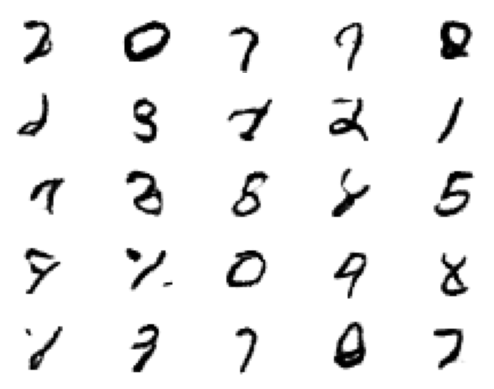

In [ ]:

from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot


def generate_latent_points(latent_dim, n_samples):

 x_input = randn(latent_dim * n_samples)

 x_input = x_input.reshape(n_samples, latent_dim)
 return x_input


def save_plot(examples, n):

 for i in range(n * n):

  pyplot.subplot(n, n, 1 + i)

  pyplot.axis('off')

  pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
 pyplot.show()


model = load_model('generator_model_100.h5')

latent_points = generate_latent_points(100, 25)

X = model.predict(latent_points)

save_plot(X, 5)